In [21]:
import h5py
import numpy as np
from skimage import measure
import cv2
import fastremap

from tasks import *

import matplotlib.pyplot as plt

In [23]:
# Load data
f = h5py.File("data/minnie10_sample.h5","r")
stack = f["main"][()]
f.close()


mask = stack[:,:,0]


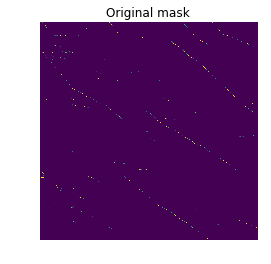

In [12]:
plt.figure()
plt.imshow(mask)
plt.title("Original mask")
plt.axis("off")
plt.show()

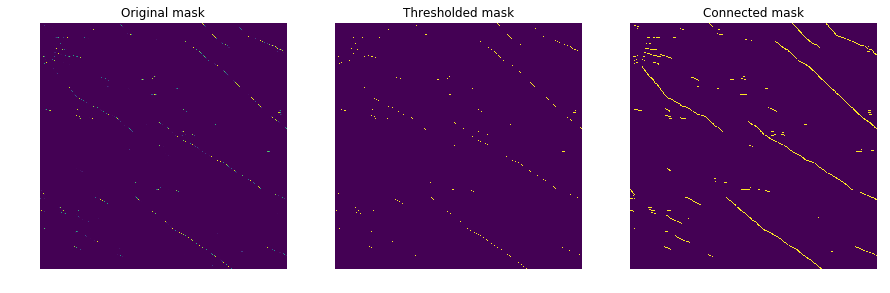

In [24]:
# Threshold
mask_thr = threshold_image(mask, 0.35)

# Dilate
w_dil = 5
mask_con = dilate_image(mask_thr, w_dil)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(mask)
plt.title("Original mask")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask_thr)
plt.title("Thresholded mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(mask_con)
plt.title("Connected mask")
plt.axis("off")

plt.show()

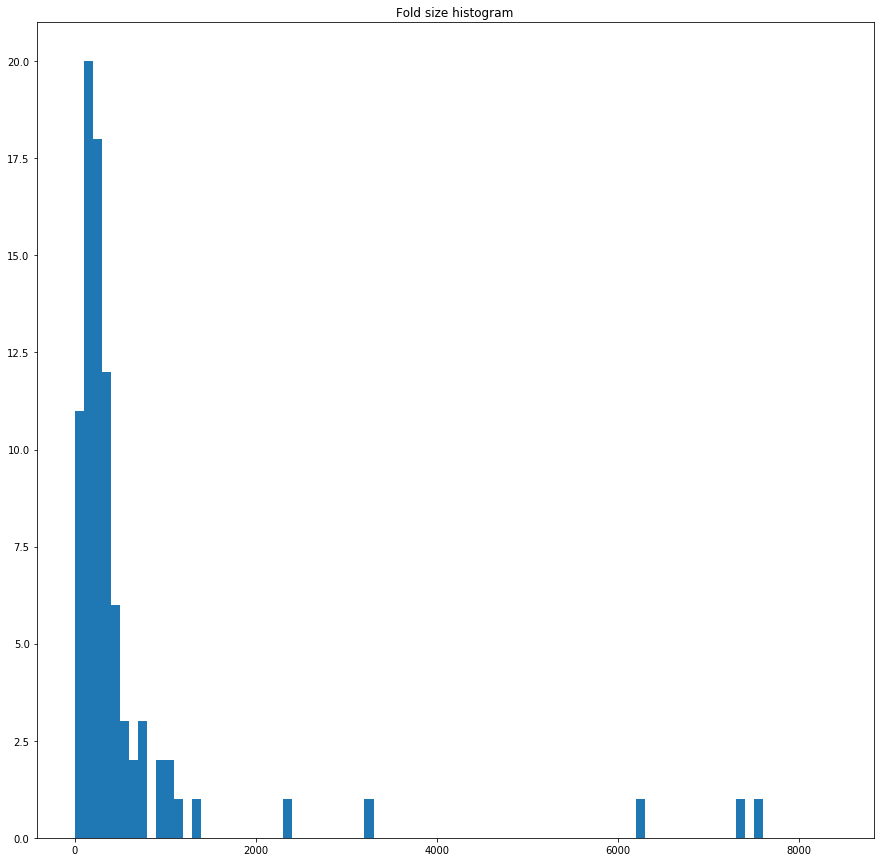

99th percentile = 25.0
95th percentile = 25.0


In [52]:
# Label folds
mask_lab = measure.label(mask_con)

# Fold number and size
fold_num, fold_size = np.unique(mask_con_lab, return_counts=True)
fold_num = fold_num[1:]; fold_size = fold_size[1:]

plt.figure(figsize=(15,15))
plt.hist(fold_size, bins=np.arange(0,np.max(fold_size),100))
plt.title("Fold size histogram")
plt.show()

print("99th percentile = " + str(np.percentile(fold_size,0.99)))
print("95th percentile = " + str(np.percentile(fold_size,0.95)))

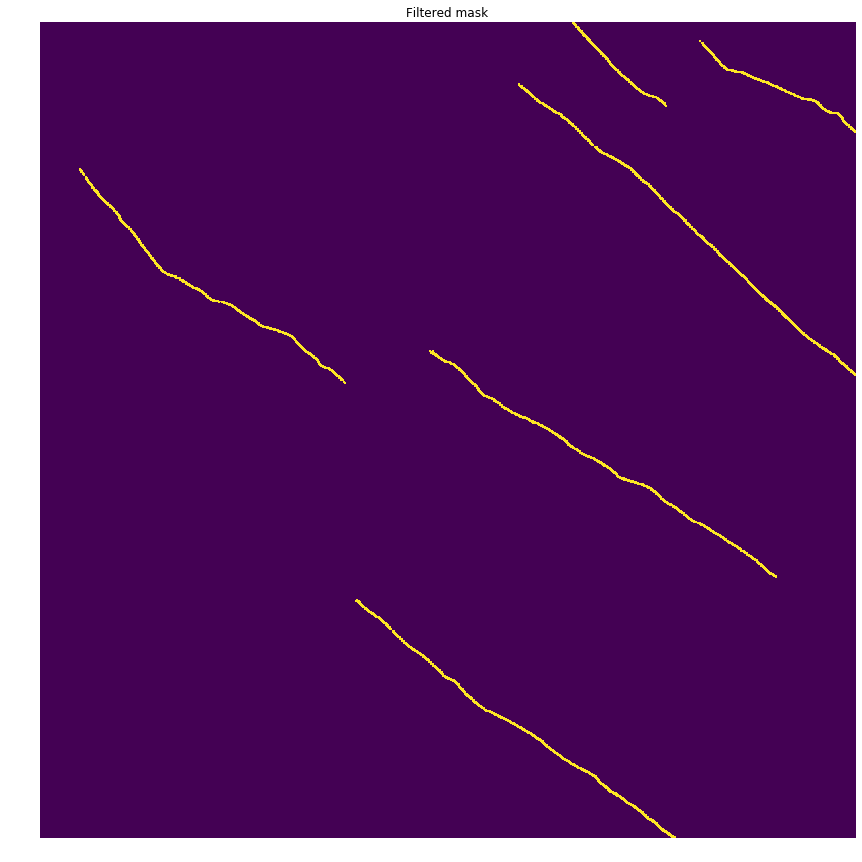

In [50]:
# Relabel folds by their size
mask_lab_vec = np.reshape(mask_lab, (-1,))
mask_relab = np.reshape(fastremap.remap_from_array_kv(mask_lab_vec, fold_num, fold_size), mask_lab.shape)

# Filter by size
mask_relab = (mask_relab>=2000).astype('uint8')

plt.figure(figsize=(15,15))
plt.imshow(mask_relab)
plt.title("Filtered mask")
plt.axis("off")
plt.show()